Análise Exploratória de Dados

Nesta etapa de análise exploratória, tem-se o objetivo de identificar os comportamentos médios e discrepantes das variáveis, procurando e identificando tendências, avaliando os comportamentos e investigando a interdependência entre as variáveis, afim de extrair o máximo de informações posssíveis. Os tópicos abordados nessa análise serão: 

* Observar se é um dataset desbalanceado;

* Tentar obter uma noção geral dos dados;

* Identificar dependência entres as features;

* Identificar erros (valores) que podem causar vies no modelo;

* Buscar padrões e interpretar análises;

# Dependências

In [1]:
#Importando bibliotecas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import cloudpickle
import matplotlib.pyplot as plt
from scipy.stats import norm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

# Dados e Constantes

In [2]:
# Constantes
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_RAW_NAME = 'Safra_2018-2019.csv'
DATA_INTER_PATH = os.path.join('..','data','inter')
DATA_INTER_TRAIN_NAME = 'train_inter.csv'
DATA_INTER_TEST_NAME = 'test_inter.csv'
FIGURES_PATH = os.path.abspath(os.path.join('..','figures'))
META_DATA_PATH = os.path.join(DATA_RAW_PATH,'dicionario_tipos.pkl')
TARGET = 'dano_na_plantacao'

In [3]:
#Dados do dicionário
with open(META_DATA_PATH,'rb') as f:
    dicionario_tipo = cloudpickle.load(f)
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME), dtype=dicionario_tipo)

# Iniciando Análise Exploratória

In [4]:
df_train.head()

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,984,0,1,2,25,12.0,19,3,0
1,851,0,0,2,20,27.0,7,2,0
2,283,0,0,3,35,27.0,0,3,0
3,2542,0,0,3,15,50.0,0,2,2
4,850,0,1,2,30,14.0,24,2,0


In [5]:
df_train.columns

Index(['Estimativa_de_Insetos', 'Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso', 'Temporada', 'dano_na_plantacao'], dtype='object')

## Características Marcantes. 

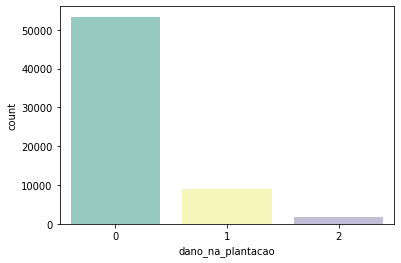

In [6]:
#Plot da distribuição da variável target "dano_na_plantacao".
sns.countplot(x=df_train['dano_na_plantacao'], data=df_train, palette="Set3")
plt.show()

A distribuição da variável target é desbalanceada, esse desbalanceamento pode interferir quando o modelo for para produção, podendo gerar uma tendência a valores "0". Já fica evidente que não poderemos utilizar acurácia como métrica de avalição do modelo, pois dados desbalanceados tendem a causar viés/tendência que é um peso desproporcional, e a acurácia é basicamente o número de acertos (positivos), e em problemas com classes desproporcionais, ela causa uma falsa impressão de bom desempenho.

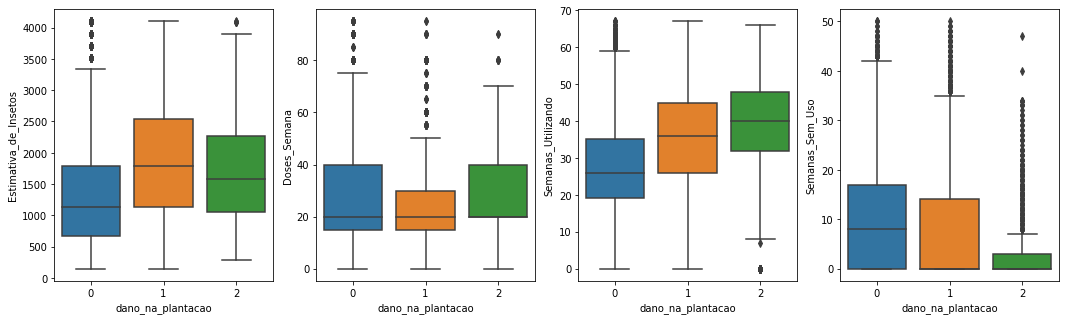

In [7]:
#BoxPlot das variáveis numéricas. 
fig, ax = plt.subplots (1, 4, figsize = (18,5))
sns.boxplot(x='dano_na_plantacao', y='Estimativa_de_Insetos', data=df_train, ax=ax[0])
sns.boxplot(x='dano_na_plantacao', y='Doses_Semana', data=df_train, ax=ax[1])
sns.boxplot(x='dano_na_plantacao', y='Semanas_Utilizando', data=df_train, ax=ax[2])
sns.boxplot(x='dano_na_plantacao', y='Semanas_Sem_Uso', data=df_train, ax=ax[3])
plt.savefig(os.path.join(FIGURES_PATH,'boxplot_variaveis_numericas.png'), format='png')
plt.show()

Com base nas análises das variáveis numéricas com o boxplot.

Quanto menor o números de insetos nas plantações`Estimativa_de_Insetos`, os danos são minimizados, ou seja, quando há pouco insetos na plantação melhor o cultivo, e quando maior o número de insetos são maiores, os danos causados por "Outros motivos". 

Em relação a faeture `Doses_Semana`, quanto mais Doses semanais de pesticidas, maiores são os danos causados pelo uso delas.


Já na feature `Semanas_Utilizando`, quanto maior o uso de pesticidas maiores são os danos causados pelo uso delas seguida de "Outros motivos" ou seja,o cultivo é prejudicado severamente por esse motivo. 


E por fim, em relação a feature`Semanas_Sem_Uso` quanto mais tempo sem uso, melhor será o cultivo, ou seja não hávera danos tão significativos na plantação, no entanto há um aumento de danos causados por "Outros motivos". 

In [8]:
#Distribuições das váriaveis numéricas. 
todas_as_variaveis = set(df_train.columns.tolist())
variaveis_categoricas = set(df_train.select_dtypes(include=['object']).columns.tolist())
variaveis_numericas = todas_as_variaveis - variaveis_categoricas

In [9]:
#plot da distribuições das variáveis numéricas.
#for col_num in variaveis_numericas:
#   plt.figure(figsize=(5,5))
#    df_train[df_train['dano_na_plantacao']=='0'][col_num].hist(alpha = 0.2, color ='blue', label = '0')
#   df_train[df_train['dano_na_plantacao']=='1'][col_num].hist(alpha = 0.3, color = 'red', label = '1')
#   df_train[df_train['dano_na_plantacao']=='1'][col_num].hist(alpha = 0.5, color = 'green', label = '2')
#   plt.savefig(os.path.join(FIGURES_PATH,'distribuicao_variaveis_numericas.png'), format='png')
#   plt.legend()
#   plt.xlabel(col_num)

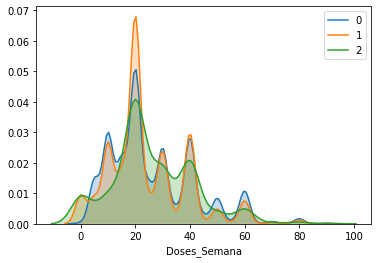

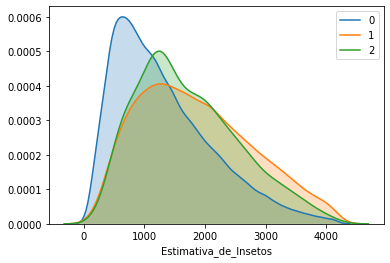

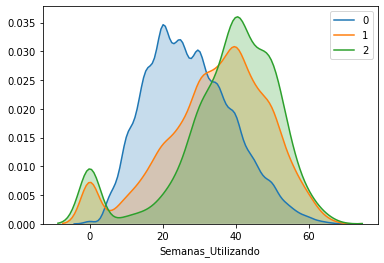

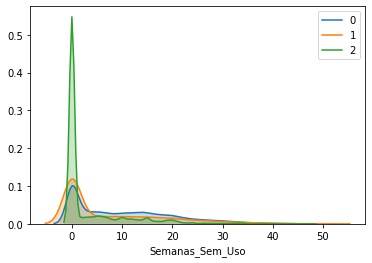

In [10]:
#Distibuição das variáveis numéricas.
for col_num in variaveis_numericas:
    sns.kdeplot(df_train[df_train['dano_na_plantacao']=='0'][col_num], label='0', shade=True)
    sns.kdeplot(df_train[df_train['dano_na_plantacao']=='1'][col_num], label='1', shade=True)
    sns.kdeplot(df_train[df_train['dano_na_plantacao']=='2'][col_num], label='2', shade=True)
    plt.xlabel(col_num)
    plt.savefig(os.path.join(FIGURES_PATH,f'distribuicao_{col_num}.png'), format='png')
    plt.show()

REVER<p>
Observando as distribuições da variáveis númericas pode-se notar que as features `Doses_Semana` e `Semana_utiizando` apresentam distribuições semelhantes, podendo assim destacar que ambas as técnicas são melhores para o cultivo quando apresentam uma média entre as distribuições parecidas, podendo desempenhar um bom resultados quando utilizadas juntas. Para a distribuição da feature`Estimativas_de_insetos` quando há um aumento no numéro de insetos o número de danos causados por "Outros motivos" aumenta significativamente, como vimos no gráfico do boxplot. Para a distribuição da feature `Semana_Sem_Uso`, quanto mais tempo sem usar os pesticidas, todos os níveis de danos são consideravelmente diminuidos em todos os aspectos, podendo concluir que se não utilizasse as pesticinas o cultivo seria melhor, porém sabe-se que o processo de cultivo tem-se que ser o mais rápido possível para atender a demanda do mercado. 

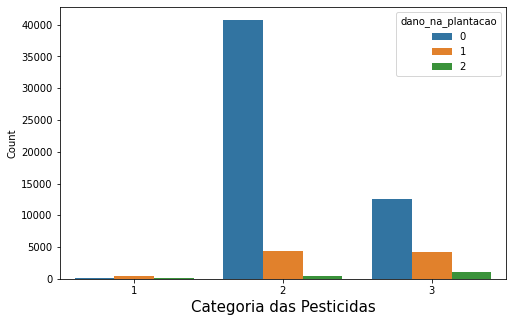

In [11]:
#Plot das variáveis categóricas em relação ao target.
#Plot da feature Categoria_pesticida.
plt.figure(figsize=(8,5))
sns.countplot(x='Categoria_Pesticida',data=df_train,hue='dano_na_plantacao')
plt.xlabel('Categoria das Pesticidas',size=15)
plt.ylabel('Count')
plt.savefig(os.path.join(FIGURES_PATH,'categoria_pesticidas.png'), format='png')
plt.show()

In [12]:
df_train.groupby('Categoria_Pesticida')['dano_na_plantacao'].value_counts(normalize=True)

Categoria_Pesticida  dano_na_plantacao
1                    1                    0.656766
                     2                    0.207921
                     0                    0.135314
2                    0                    0.892816
                     1                    0.096295
                     2                    0.010889
3                    0                    0.706472
                     1                    0.233932
                     2                    0.059596
Name: dano_na_plantacao, dtype: float64

In [13]:
df_train['dano_na_plantacao'].value_counts(normalize=True)

0    0.833953
1    0.139781
2    0.026266
Name: dano_na_plantacao, dtype: float64

Quando há o uso da `Categoria_pesticida` 2, há uma melhora no desempenho no cultivo, e a classe (Sem danos(0)) é majoritária, representando 89% dos casos.

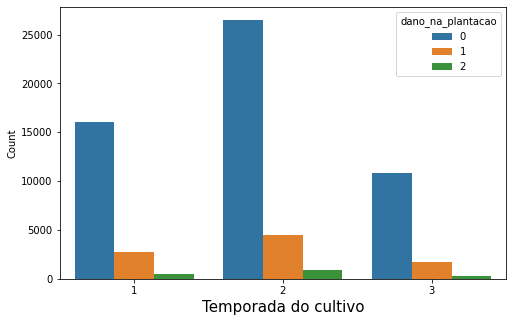

In [14]:
#Plot da feature Temporada
plt.figure(figsize=(8,5))
sns.countplot(x='Temporada',data=df_train,hue='dano_na_plantacao')
plt.xlabel('Temporada do cultivo',size=15)
plt.ylabel('Count')
plt.savefig(os.path.join(FIGURES_PATH,'temporada_cultivo.png'), format='png')
plt.show()

In [15]:
df_train.groupby('Temporada')['dano_na_plantacao'].value_counts(normalize=True)

Temporada  dano_na_plantacao
1          0                    0.833307
           1                    0.141414
           2                    0.025278
2          0                    0.832260
           1                    0.139846
           2                    0.027894
3          0                    0.839114
           1                    0.137170
           2                    0.023717
Name: dano_na_plantacao, dtype: float64

In [16]:
df_train['dano_na_plantacao'].value_counts(normalize=True)

0    0.833953
1    0.139781
2    0.026266
Name: dano_na_plantacao, dtype: float64

Essa variável apresenta nenhuma ou quase nenhuma relação com o problema. Vemos acima que a distribuição do target ao longo dos níveis da variável é muito parecida, ou seja, esta apresenta pouco ou nenhum poder descriminatório entre as classes. Dessa forma, é uma forte candidata a seŕ removida na etapa de Seleção de Features.

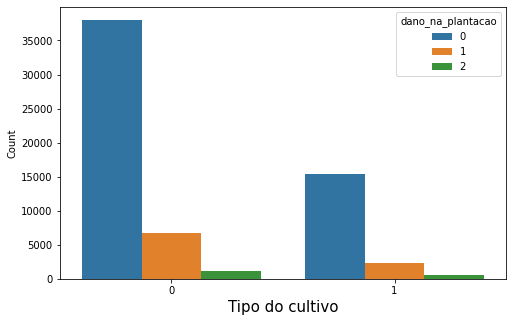

In [17]:
#Plot da feature tipo_de_cultivo
plt.figure(figsize=(8,5))
sns.countplot(x='Tipo_de_Cultivo',data=df_train,hue='dano_na_plantacao')
plt.xlabel('Tipo do cultivo',size=15)
plt.ylabel('Count')
plt.savefig(os.path.join(FIGURES_PATH,'tipo_do_cultivo.png'), format='png')
plt.show()

In [18]:
df_train.groupby('Tipo_de_Cultivo')['dano_na_plantacao'].value_counts(normalize=True)

Tipo_de_Cultivo  dano_na_plantacao
0                0                    0.828846
                 1                    0.145383
                 2                    0.025771
1                0                    0.846871
                 1                    0.125613
                 2                    0.027516
Name: dano_na_plantacao, dtype: float64

A variável `Tipo_de_Cultivo` não apresenta um grande poder preditivo, mas há uma diferença na distribuição. Precisamos ver se isso é estatísticamente significante.

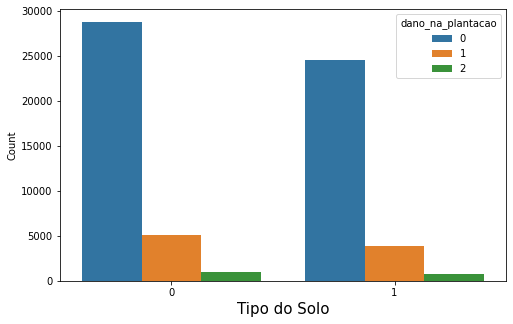

In [19]:
#Plot da feature tipo_do_solo
plt.figure(figsize=(8,5))
sns.countplot(x='Tipo_de_Solo',data=df_train,hue='dano_na_plantacao')
plt.xlabel('Tipo do Solo',size=15)
plt.ylabel('Count')
plt.savefig(os.path.join(FIGURES_PATH,'Tipo_de_Solo.png'), format='png')
plt.show()

In [20]:
df_train.groupby('Tipo_de_Solo')['dano_na_plantacao'].value_counts(normalize=True)

Tipo_de_Solo  dano_na_plantacao
0             0                    0.827075
              1                    0.145517
              2                    0.027408
1             0                    0.842154
              1                    0.132943
              2                    0.024903
Name: dano_na_plantacao, dtype: float64

O mesmo pode ser observado para a fature `Tipo_de_Solo` que não apresenta diferenças significativas nas distribuições do target ao longo dos níveis da variável. Contudo, iremos testar essa hipótese utilizando um algoritmo apropriado de seleção de features.